In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from statsmodels.tsa.arima_model import ARIMA

In [2]:
sales = pd.read_excel(r"C:\Users\SHIVAM\OneDrive\Desktop\Data science Assignment\Forecasting\CocaCola_Sales_Rawdata.xlsx")

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
sales

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


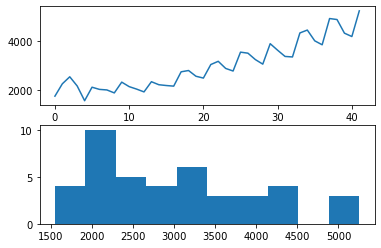

In [5]:
plt.subplot(211)
plt.plot(sales['Sales'])
plt.subplot(212)
plt.hist(sales['Sales'])
plt.show()

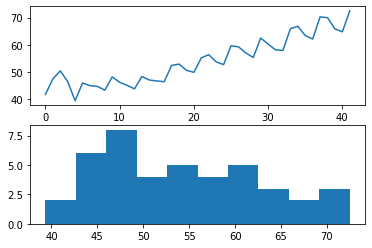

In [7]:
df = np.sqrt(sales['Sales'])
plt.subplot(211)
plt.plot(df)
# histogram
plt.subplot(212)
plt.hist(df)
plt.show()

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

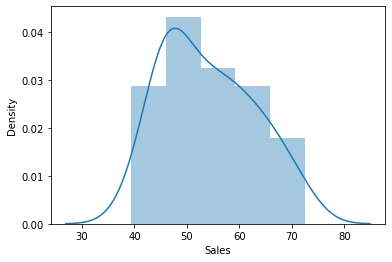

In [8]:
sns.distplot(df)

<AxesSubplot:ylabel='Density'>

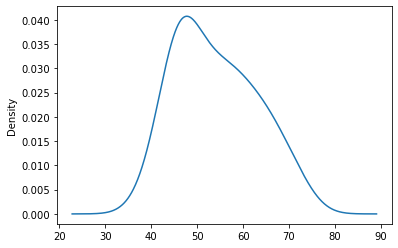

In [9]:
df.plot(kind="kde")

In [10]:
len(df)

42

In [11]:
sales['quarter'] = 0
for i in range(42):
    p = sales['Quarter'][i]
    sales['quarter'][i]=p[0:2]


C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_29868\2580629054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['quarter'][i]=p[0:2]


In [12]:
sales.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [13]:
sales_dummies=pd.DataFrame(pd.get_dummies(sales['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([sales,sales_dummies],axis= 1)

In [14]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [15]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(sales['Sales'])

In [16]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [17]:
Train =cc.head(32)
Test =cc.tail(10)

<AxesSubplot:>

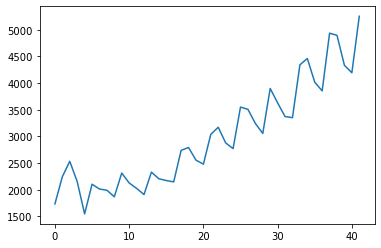

In [18]:
sales['Sales'].plot()

## Model

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [21]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

22.724051812293908

In [22]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_29868\208563640.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


16.720650798322502

In [23]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

12.539326036238327

In [24]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

11.281723378185117

### ARIMA Model

In [91]:
data = pd.read_excel(r"C:\Users\SHIVAM\OneDrive\Desktop\Data science Assignment\Forecasting\CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [92]:
#separate out a validation dataset
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [93]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [94]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from statsmodels.tsa.arima.model import ARIMA


train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

train


0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [95]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [96]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    mape = (MAPE(test, predictions))
    return mape

In [90]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [52]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=76.755
ARIMA(0, 0, 1) RMSE=47.347
ARIMA(0, 0, 2) RMSE=36.030
ARIMA(0, 1, 0) RMSE=21.975
ARIMA(0, 1, 1) RMSE=21.907
ARIMA(0, 1, 2) RMSE=22.178
ARIMA(0, 2, 0) RMSE=28.992
ARIMA(0, 2, 1) RMSE=22.314
ARIMA(0, 2, 2) RMSE=22.196
ARIMA(1, 0, 0) RMSE=23.957
ARIMA(1, 0, 1) RMSE=23.991
ARIMA(1, 0, 2) RMSE=25.384
ARIMA(1, 1, 0) RMSE=21.921
ARIMA(1, 1, 1) RMSE=21.879
ARIMA(1, 1, 2) RMSE=23.314
ARIMA(1, 2, 0) RMSE=27.464
ARIMA(1, 2, 1) RMSE=22.219
ARIMA(1, 2, 2) RMSE=22.781
ARIMA(2, 0, 0) RMSE=24.101
ARIMA(2, 0, 1) RMSE=24.113
ARIMA(2, 0, 2) RMSE=25.451
ARIMA(2, 1, 0) RMSE=21.732
ARIMA(2, 1, 1) RMSE=23.823
ARIMA(2, 1, 2) RMSE=27.510
ARIMA(2, 2, 0) RMSE=25.282
ARIMA(2, 2, 1) RMSE=22.064
ARIMA(2, 2, 2) RMSE=23.255
Best ARIMA(2, 1, 0) RMSE=21.732


In [53]:
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [77]:
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
pred = model_fit.predict(1,79)

In [89]:
evaluate_arima_model(X,(2,1,0))

12.982198072313224

#### Least MAPE value is given by Holts winter exponential smoothing with multiplicative seasonality and additive trend model.